In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[32,32,32,32,32,32] #liding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=16
Axis='AccX' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Optim/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

In [7]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

AccX is registed now
Build Complete
(254742,)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 1)
hiden node = 16
-edim=16-Window=128-Overlap=32-SGD
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.5781 - val_loss: 0.4085
Epoch 2/50
0s - loss: 0.2891 - val_loss: 0.1947
Epoch 3/50
0s - loss: 0.1427 - val_loss: 0.1043
Epoch 4/50
0s - loss: 0.0841 - val_loss: 0.0690
Epoch 5/50
0s - loss: 0.0605 - val_loss: 0.0538
Epoch 6/50
0s - loss: 0.0494 - val_loss: 0.0456
Epoch 7/50
0s - loss: 0.0428 - val_loss: 0.0403
Epoch 8/50
0s - loss: 0.0383 - val_loss: 0.0364
Epoch 9/50
0s - loss: 0.0350 - val_loss: 0.0336
Epoch 10/50
0s - loss: 0.0324 - val_loss: 0.0313
Epoch 11/50
0s - loss: 0.0304 - val_loss: 0.0295
Epoch 12/50
0s - loss: 0.0288 - val_loss: 0.0280
Epoch 13/50
0s - loss: 0.0274 - val_loss: 0.0268
Epoch 14/50
0s - loss: 0.0262 - val_loss: 0.0257
Epoch 15/50
0s - loss: 0.0252 - val_loss: 0.0247
Epoch 16/50
0s - loss: 0.0243 - val_loss: 0

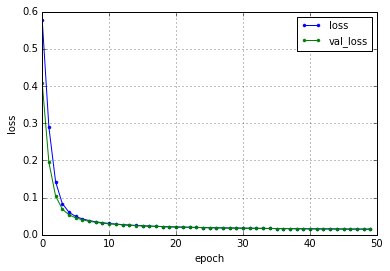

hiden node = 16
-edim=16-Window=128-Overlap=32-Adadelta
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1527 - val_loss: 0.0244
Epoch 2/50
0s - loss: 0.0185 - val_loss: 0.0147
Epoch 3/50
0s - loss: 0.0148 - val_loss: 0.0127
Epoch 4/50
0s - loss: 0.0134 - val_loss: 0.0110
Epoch 5/50
0s - loss: 0.0110 - val_loss: 0.0153
Epoch 6/50
0s - loss: 0.0091 - val_loss: 0.0079
Epoch 7/50
0s - loss: 0.0076 - val_loss: 0.0067
Epoch 8/50
0s - loss: 0.0068 - val_loss: 0.0056
Epoch 9/50
0s - loss: 0.0069 - val_loss: 0.0059
Epoch 10/50
0s - loss: 0.0066 - val_loss: 0.0052
Epoch 11/50
0s - loss: 0.0061 - val_loss: 0.0130
Epoch 12/50
0s - loss: 0.0061 - val_loss: 0.0046
Epoch 13/50
0s - loss: 0.0058 - val_loss: 0.0069
Epoch 14/50
0s - loss: 0.0052 - val_loss: 0.0041
Epoch 15/50
0s - loss: 0.0053 - val_loss: 0.0046
Epoch 16/50
0s - loss: 0.0056 - val_loss: 0.0058
Epoch 17/50
0s - loss: 0.0049 - val_loss: 0.0067
Epoch 18/50
0s - loss: 0.0052 - val_loss: 0.0053
Epoch 19/50
0s - loss: 

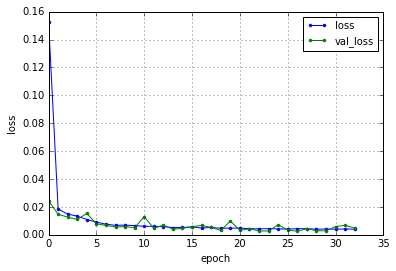

hiden node = 16
-edim=16-Window=128-Overlap=32-Adamax
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1112 - val_loss: 0.0200
Epoch 2/50
0s - loss: 0.0169 - val_loss: 0.0148
Epoch 3/50
0s - loss: 0.0137 - val_loss: 0.0128
Epoch 4/50
0s - loss: 0.0115 - val_loss: 0.0104
Epoch 5/50
0s - loss: 0.0094 - val_loss: 0.0081
Epoch 6/50
0s - loss: 0.0074 - val_loss: 0.0066
Epoch 7/50
0s - loss: 0.0061 - val_loss: 0.0061
Epoch 8/50
0s - loss: 0.0051 - val_loss: 0.0045
Epoch 9/50
0s - loss: 0.0045 - val_loss: 0.0041
Epoch 10/50
0s - loss: 0.0038 - val_loss: 0.0042
Epoch 11/50
0s - loss: 0.0033 - val_loss: 0.0028
Epoch 12/50
0s - loss: 0.0028 - val_loss: 0.0024
Epoch 13/50
0s - loss: 0.0024 - val_loss: 0.0022
Epoch 14/50
0s - loss: 0.0022 - val_loss: 0.0019
Epoch 15/50
0s - loss: 0.0019 - val_loss: 0.0017
Epoch 16/50
0s - loss: 0.0017 - val_loss: 0.0024
Epoch 17/50
0s - loss: 0.0016 - val_loss: 0.0013
Epoch 18/50
0s - loss: 0.0014 - val_loss: 0.0012
Epoch 19/50
0s - loss: 0.

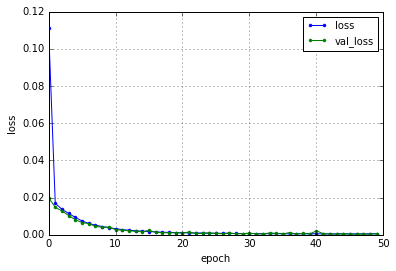

hiden node = 16
-edim=16-Window=128-Overlap=32-Adam
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.1360 - val_loss: 0.0198
Epoch 2/50
1s - loss: 0.0165 - val_loss: 0.0145
Epoch 3/50
1s - loss: 0.0129 - val_loss: 0.0120
Epoch 4/50
1s - loss: 0.0105 - val_loss: 0.0087
Epoch 5/50
1s - loss: 0.0079 - val_loss: 0.0069
Epoch 6/50
1s - loss: 0.0061 - val_loss: 0.0051
Epoch 7/50
1s - loss: 0.0051 - val_loss: 0.0044
Epoch 8/50
1s - loss: 0.0043 - val_loss: 0.0038
Epoch 9/50
1s - loss: 0.0038 - val_loss: 0.0036
Epoch 10/50
1s - loss: 0.0034 - val_loss: 0.0033
Epoch 11/50
1s - loss: 0.0030 - val_loss: 0.0026
Epoch 12/50
1s - loss: 0.0027 - val_loss: 0.0023
Epoch 13/50
1s - loss: 0.0024 - val_loss: 0.0022
Epoch 14/50
1s - loss: 0.0023 - val_loss: 0.0020
Epoch 15/50
1s - loss: 0.0021 - val_loss: 0.0017
Epoch 16/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 17/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 18/50
1s - loss: 0.0017 - val_loss: 0.0015
Epoch 19/50
1s - loss: 0.00

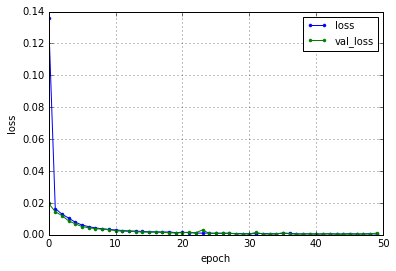

hiden node = 16
-edim=16-Window=128-Overlap=32-Adagrad
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0478 - val_loss: 0.0165
Epoch 2/50
0s - loss: 0.0154 - val_loss: 0.0135
Epoch 3/50
0s - loss: 0.0134 - val_loss: 0.0129
Epoch 4/50
0s - loss: 0.0116 - val_loss: 0.0107
Epoch 5/50
1s - loss: 0.0103 - val_loss: 0.0103
Epoch 6/50
1s - loss: 0.0090 - val_loss: 0.0081
Epoch 7/50
1s - loss: 0.0082 - val_loss: 0.0073
Epoch 8/50
1s - loss: 0.0074 - val_loss: 0.0071
Epoch 9/50
1s - loss: 0.0068 - val_loss: 0.0062
Epoch 10/50
1s - loss: 0.0061 - val_loss: 0.0057
Epoch 11/50
1s - loss: 0.0058 - val_loss: 0.0055
Epoch 12/50
1s - loss: 0.0055 - val_loss: 0.0057
Epoch 13/50
1s - loss: 0.0052 - val_loss: 0.0051
Epoch 14/50
1s - loss: 0.0050 - val_loss: 0.0049
Epoch 15/50
1s - loss: 0.0048 - val_loss: 0.0046
Epoch 16/50
1s - loss: 0.0046 - val_loss: 0.0044
Epoch 17/50
1s - loss: 0.0045 - val_loss: 0.0041
Epoch 18/50
1s - loss: 0.0043 - val_loss: 0.0041
Epoch 19/50
1s - loss: 0

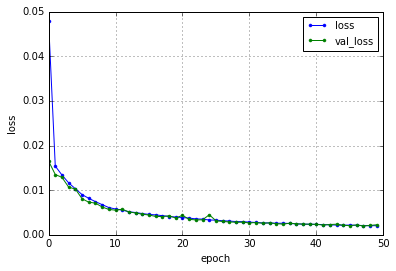

hiden node = 16
-edim=16-Window=128-Overlap=32-RMSprop
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0866 - val_loss: 0.0136
Epoch 2/50
1s - loss: 0.0140 - val_loss: 0.0284
Epoch 3/50
1s - loss: 0.0115 - val_loss: 0.0138
Epoch 4/50
1s - loss: 0.0102 - val_loss: 0.0064
Epoch 5/50
0s - loss: 0.0097 - val_loss: 0.0066
Epoch 6/50
0s - loss: 0.0090 - val_loss: 0.0103
Epoch 7/50
0s - loss: 0.0085 - val_loss: 0.0080
Epoch 8/50
0s - loss: 0.0084 - val_loss: 0.0070
Epoch 9/50
0s - loss: 0.0081 - val_loss: 0.0073
Epoch 10/50
1s - loss: 0.0078 - val_loss: 0.0111


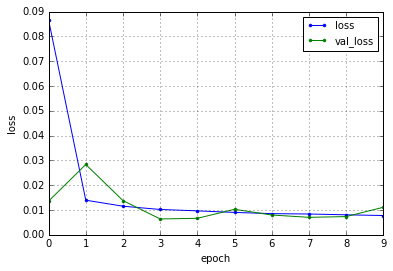

hiden node = 16
-edim=16-Window=128-Overlap=32-Nadam
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0751 - val_loss: 0.0188
Epoch 2/50
1s - loss: 0.0174 - val_loss: 0.0201
Epoch 3/50
1s - loss: 0.0133 - val_loss: 0.0083
Epoch 4/50
1s - loss: 0.0110 - val_loss: 0.0103
Epoch 5/50
1s - loss: 0.0097 - val_loss: 0.0112
Epoch 6/50
1s - loss: 0.0088 - val_loss: 0.0084
Epoch 7/50
1s - loss: 0.0082 - val_loss: 0.0065
Epoch 8/50
1s - loss: 0.0073 - val_loss: 0.0097
Epoch 9/50
1s - loss: 0.0071 - val_loss: 0.0054
Epoch 10/50
1s - loss: 0.0067 - val_loss: 0.0054
Epoch 11/50
1s - loss: 0.0064 - val_loss: 0.0041
Epoch 12/50
1s - loss: 0.0062 - val_loss: 0.0043
Epoch 13/50
0s - loss: 0.0058 - val_loss: 0.0041
Epoch 14/50
0s - loss: 0.0052 - val_loss: 0.0102
Epoch 15/50
0s - loss: 0.0052 - val_loss: 0.0037
Epoch 16/50
1s - loss: 0.0048 - val_loss: 0.0030
Epoch 17/50
1s - loss: 0.0046 - val_loss: 0.0052
Epoch 18/50
1s - loss: 0.0045 - val_loss: 0.0027
Epoch 19/50
0s - loss: 0.0

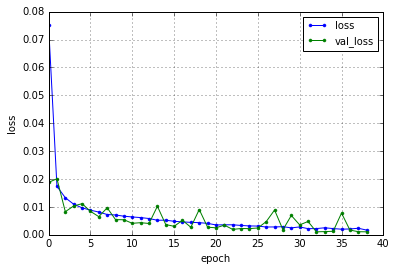

AccX is registed now
Build Complete
(254742,)
windowData's num =7953
SourceData's aborting data = 22
window shape is (7953, 256, 1)
hiden node = 16
-edim=16-Window=256-Overlap=32-SGD
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
1s - loss: 0.6864 - val_loss: 0.5902
Epoch 2/50
1s - loss: 0.4917 - val_loss: 0.3985
Epoch 3/50
1s - loss: 0.3257 - val_loss: 0.2621
Epoch 4/50
1s - loss: 0.2170 - val_loss: 0.1787
Epoch 5/50
1s - loss: 0.1523 - val_loss: 0.1300
Epoch 6/50
1s - loss: 0.1145 - val_loss: 0.1011
Epoch 7/50
0s - loss: 0.0916 - val_loss: 0.0832
Epoch 8/50
0s - loss: 0.0769 - val_loss: 0.0713
Epoch 9/50
0s - loss: 0.0669 - val_loss: 0.0629
Epoch 10/50
1s - loss: 0.0597 - val_loss: 0.0568
Epoch 11/50
1s - loss: 0.0544 - val_loss: 0.0522
Epoch 12/50
1s - loss: 0.0504 - val_loss: 0.0487
Epoch 13/50
1s - loss: 0.0473 - val_loss: 0.0459
Epoch 14/50
1s - loss: 0.0448 - val_loss: 0.0437
Epoch 15/50
1s - loss: 0.0427 - val_loss: 0.0418
Epoch 16/50
1s - loss: 0.0410 - val_loss: 0

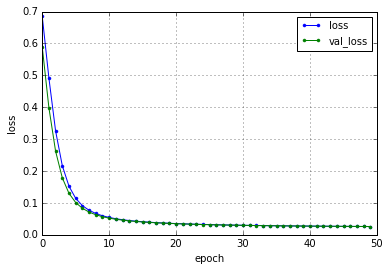

hiden node = 16
-edim=16-Window=256-Overlap=32-Adadelta
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
1s - loss: 0.1881 - val_loss: 0.0359
Epoch 2/50
0s - loss: 0.0300 - val_loss: 0.0339
Epoch 3/50
0s - loss: 0.0267 - val_loss: 0.0220
Epoch 4/50
0s - loss: 0.0218 - val_loss: 0.0199
Epoch 5/50
0s - loss: 0.0175 - val_loss: 0.0154
Epoch 6/50
0s - loss: 0.0159 - val_loss: 0.0178
Epoch 7/50
0s - loss: 0.0142 - val_loss: 0.0116
Epoch 8/50
0s - loss: 0.0137 - val_loss: 0.0124
Epoch 9/50
0s - loss: 0.0120 - val_loss: 0.0096
Epoch 10/50
0s - loss: 0.0121 - val_loss: 0.0114
Epoch 11/50
0s - loss: 0.0113 - val_loss: 0.0094
Epoch 12/50
0s - loss: 0.0105 - val_loss: 0.0083
Epoch 13/50
0s - loss: 0.0107 - val_loss: 0.0091
Epoch 14/50
0s - loss: 0.0096 - val_loss: 0.0137
Epoch 15/50
0s - loss: 0.0097 - val_loss: 0.0074
Epoch 16/50
0s - loss: 0.0097 - val_loss: 0.0071
Epoch 17/50
0s - loss: 0.0090 - val_loss: 0.0073
Epoch 18/50
0s - loss: 0.0092 - val_loss: 0.0176
Epoch 19/50
0s - loss: 

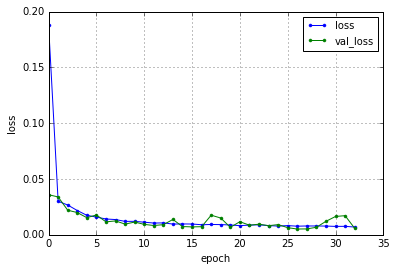

hiden node = 16
-edim=16-Window=256-Overlap=32-Adamax
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0855 - val_loss: 0.0270
Epoch 2/50
0s - loss: 0.0242 - val_loss: 0.0231
Epoch 3/50
0s - loss: 0.0201 - val_loss: 0.0172
Epoch 4/50
0s - loss: 0.0151 - val_loss: 0.0126
Epoch 5/50
0s - loss: 0.0117 - val_loss: 0.0102
Epoch 6/50
0s - loss: 0.0094 - val_loss: 0.0082
Epoch 7/50
0s - loss: 0.0078 - val_loss: 0.0071
Epoch 8/50
0s - loss: 0.0066 - val_loss: 0.0060
Epoch 9/50
0s - loss: 0.0059 - val_loss: 0.0050
Epoch 10/50
0s - loss: 0.0049 - val_loss: 0.0048
Epoch 11/50
0s - loss: 0.0042 - val_loss: 0.0037
Epoch 12/50
0s - loss: 0.0040 - val_loss: 0.0036
Epoch 13/50
0s - loss: 0.0034 - val_loss: 0.0029
Epoch 14/50
0s - loss: 0.0031 - val_loss: 0.0027
Epoch 15/50
0s - loss: 0.0028 - val_loss: 0.0023
Epoch 16/50
0s - loss: 0.0027 - val_loss: 0.0022
Epoch 17/50
0s - loss: 0.0024 - val_loss: 0.0020
Epoch 18/50
0s - loss: 0.0021 - val_loss: 0.0018
Epoch 19/50
1s - loss: 0.

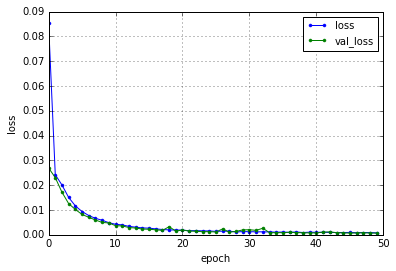

hiden node = 16
-edim=16-Window=256-Overlap=32-Adam
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
1s - loss: 0.1093 - val_loss: 0.0262
Epoch 2/50
1s - loss: 0.0230 - val_loss: 0.0201
Epoch 3/50
1s - loss: 0.0166 - val_loss: 0.0133
Epoch 4/50
1s - loss: 0.0119 - val_loss: 0.0103
Epoch 5/50
1s - loss: 0.0094 - val_loss: 0.0086
Epoch 6/50
1s - loss: 0.0075 - val_loss: 0.0065
Epoch 7/50
1s - loss: 0.0062 - val_loss: 0.0055
Epoch 8/50
0s - loss: 0.0056 - val_loss: 0.0060
Epoch 9/50
0s - loss: 0.0053 - val_loss: 0.0050
Epoch 10/50
1s - loss: 0.0045 - val_loss: 0.0047
Epoch 11/50
1s - loss: 0.0043 - val_loss: 0.0044
Epoch 12/50
1s - loss: 0.0038 - val_loss: 0.0034
Epoch 13/50
1s - loss: 0.0034 - val_loss: 0.0030
Epoch 14/50
1s - loss: 0.0032 - val_loss: 0.0028
Epoch 15/50
0s - loss: 0.0029 - val_loss: 0.0032
Epoch 16/50
0s - loss: 0.0028 - val_loss: 0.0032
Epoch 17/50
1s - loss: 0.0028 - val_loss: 0.0073
Epoch 18/50
1s - loss: 0.0025 - val_loss: 0.0019
Epoch 19/50
1s - loss: 0.00

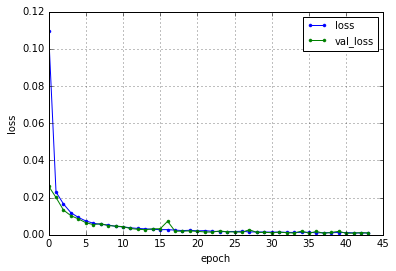

hiden node = 16
-edim=16-Window=256-Overlap=32-Adagrad
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0566 - val_loss: 0.0315
Epoch 2/50
0s - loss: 0.0253 - val_loss: 0.0231
Epoch 3/50
0s - loss: 0.0202 - val_loss: 0.0169
Epoch 4/50
1s - loss: 0.0168 - val_loss: 0.0140
Epoch 5/50
1s - loss: 0.0137 - val_loss: 0.0121
Epoch 6/50
0s - loss: 0.0125 - val_loss: 0.0266
Epoch 7/50
0s - loss: 0.0115 - val_loss: 0.0165
Epoch 8/50
0s - loss: 0.0102 - val_loss: 0.0091
Epoch 9/50
1s - loss: 0.0097 - val_loss: 0.0088
Epoch 10/50
1s - loss: 0.0090 - val_loss: 0.0080
Epoch 11/50
1s - loss: 0.0084 - val_loss: 0.0097
Epoch 12/50
1s - loss: 0.0080 - val_loss: 0.0093
Epoch 13/50
1s - loss: 0.0078 - val_loss: 0.0107
Epoch 14/50
1s - loss: 0.0072 - val_loss: 0.0065
Epoch 15/50
1s - loss: 0.0070 - val_loss: 0.0063
Epoch 16/50
1s - loss: 0.0067 - val_loss: 0.0074
Epoch 17/50
1s - loss: 0.0065 - val_loss: 0.0072
Epoch 18/50
1s - loss: 0.0059 - val_loss: 0.0057
Epoch 19/50
1s - loss: 0

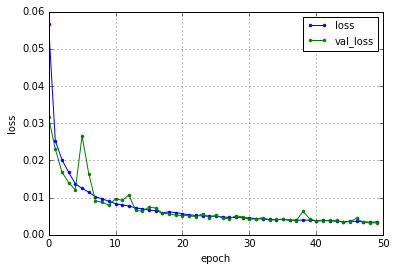

hiden node = 16
-edim=16-Window=256-Overlap=32-RMSprop
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0982 - val_loss: 0.0307
Epoch 2/50
0s - loss: 0.0224 - val_loss: 0.0146
Epoch 3/50
0s - loss: 0.0185 - val_loss: 0.0125
Epoch 4/50
0s - loss: 0.0171 - val_loss: 0.0129
Epoch 5/50
1s - loss: 0.0160 - val_loss: 0.0107
Epoch 6/50
0s - loss: 0.0150 - val_loss: 0.0146
Epoch 7/50
0s - loss: 0.0146 - val_loss: 0.0233
Epoch 8/50
0s - loss: 0.0141 - val_loss: 0.0165
Epoch 9/50
0s - loss: 0.0139 - val_loss: 0.0085
Epoch 10/50
1s - loss: 0.0133 - val_loss: 0.0085
Epoch 11/50
1s - loss: 0.0133 - val_loss: 0.0234
Epoch 12/50
1s - loss: 0.0129 - val_loss: 0.0088
Epoch 13/50
1s - loss: 0.0129 - val_loss: 0.0212
Epoch 14/50
1s - loss: 0.0126 - val_loss: 0.0094
Epoch 15/50
1s - loss: 0.0127 - val_loss: 0.0183


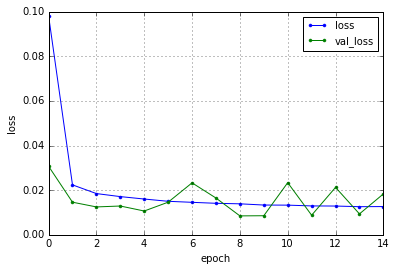

hiden node = 16
-edim=16-Window=256-Overlap=32-Nadam
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
1s - loss: 0.0874 - val_loss: 0.0546
Epoch 2/50
1s - loss: 0.0283 - val_loss: 0.0197
Epoch 3/50
1s - loss: 0.0213 - val_loss: 0.0184
Epoch 4/50
1s - loss: 0.0178 - val_loss: 0.0127
Epoch 5/50
1s - loss: 0.0165 - val_loss: 0.0115
Epoch 6/50
1s - loss: 0.0147 - val_loss: 0.0097
Epoch 7/50
1s - loss: 0.0135 - val_loss: 0.0444
Epoch 8/50
1s - loss: 0.0130 - val_loss: 0.0136
Epoch 9/50
1s - loss: 0.0121 - val_loss: 0.0083
Epoch 10/50
1s - loss: 0.0115 - val_loss: 0.0098
Epoch 11/50
1s - loss: 0.0108 - val_loss: 0.0071
Epoch 12/50
1s - loss: 0.0096 - val_loss: 0.0075
Epoch 13/50
1s - loss: 0.0096 - val_loss: 0.0057
Epoch 14/50
1s - loss: 0.0089 - val_loss: 0.0083
Epoch 15/50
1s - loss: 0.0086 - val_loss: 0.0119
Epoch 16/50
1s - loss: 0.0079 - val_loss: 0.0086
Epoch 17/50
1s - loss: 0.0078 - val_loss: 0.0050
Epoch 18/50
1s - loss: 0.0078 - val_loss: 0.0106
Epoch 19/50
1s - loss: 0.0

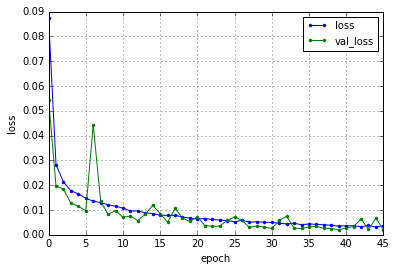

AccX is registed now
Build Complete
(254742,)
windowData's num =7945
SourceData's aborting data = 22
window shape is (7945, 512, 1)
hiden node = 16
-edim=16-Window=512-Overlap=32-SGD
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.7229 - val_loss: 0.6656
Epoch 2/50
0s - loss: 0.6056 - val_loss: 0.5441
Epoch 3/50
0s - loss: 0.4881 - val_loss: 0.4350
Epoch 4/50
0s - loss: 0.3899 - val_loss: 0.3478
Epoch 5/50
0s - loss: 0.3130 - val_loss: 0.2808
Epoch 6/50
0s - loss: 0.2544 - val_loss: 0.2301
Epoch 7/50
0s - loss: 0.2103 - val_loss: 0.1920
Epoch 8/50
0s - loss: 0.1770 - val_loss: 0.1630
Epoch 9/50
0s - loss: 0.1515 - val_loss: 0.1407
Epoch 10/50
0s - loss: 0.1318 - val_loss: 0.1234
Epoch 11/50
0s - loss: 0.1163 - val_loss: 0.1097
Epoch 12/50
0s - loss: 0.1041 - val_loss: 0.0988
Epoch 13/50
0s - loss: 0.0943 - val_loss: 0.0900
Epoch 14/50
0s - loss: 0.0864 - val_loss: 0.0830
Epoch 15/50
0s - loss: 0.0800 - val_loss: 0.0772
Epoch 16/50
0s - loss: 0.0748 - val_loss: 0

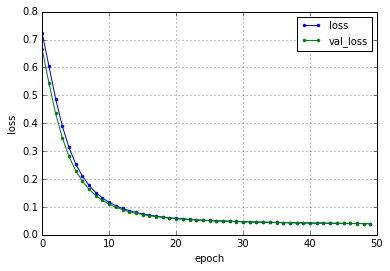

hiden node = 16
-edim=16-Window=512-Overlap=32-Adadelta
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.1841 - val_loss: 0.0483
Epoch 2/50
0s - loss: 0.0404 - val_loss: 0.0469
Epoch 3/50
0s - loss: 0.0363 - val_loss: 0.0338
Epoch 4/50
0s - loss: 0.0320 - val_loss: 0.0281
Epoch 5/50
0s - loss: 0.0273 - val_loss: 0.0249
Epoch 6/50
0s - loss: 0.0243 - val_loss: 0.0197
Epoch 7/50
0s - loss: 0.0213 - val_loss: 0.0175
Epoch 8/50
0s - loss: 0.0202 - val_loss: 0.0185
Epoch 9/50
0s - loss: 0.0191 - val_loss: 0.0178
Epoch 10/50
0s - loss: 0.0179 - val_loss: 0.0174
Epoch 11/50
0s - loss: 0.0174 - val_loss: 0.0171
Epoch 12/50
0s - loss: 0.0170 - val_loss: 0.0134
Epoch 13/50
0s - loss: 0.0169 - val_loss: 0.0129
Epoch 14/50
0s - loss: 0.0165 - val_loss: 0.0147
Epoch 15/50
0s - loss: 0.0160 - val_loss: 0.0143
Epoch 16/50
0s - loss: 0.0157 - val_loss: 0.0132
Epoch 17/50
0s - loss: 0.0155 - val_loss: 0.0126
Epoch 18/50
0s - loss: 0.0148 - val_loss: 0.0278
Epoch 19/50
0s - loss: 

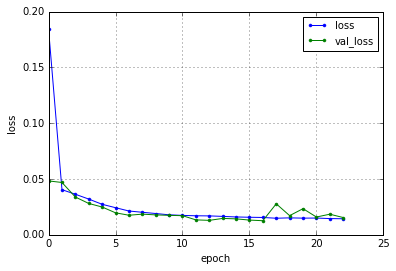

hiden node = 16
-edim=16-Window=512-Overlap=32-Adamax
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0935 - val_loss: 0.0369
Epoch 2/50
0s - loss: 0.0335 - val_loss: 0.0319
Epoch 3/50
0s - loss: 0.0259 - val_loss: 0.0219
Epoch 4/50
0s - loss: 0.0197 - val_loss: 0.0171
Epoch 5/50
0s - loss: 0.0154 - val_loss: 0.0163
Epoch 6/50
0s - loss: 0.0132 - val_loss: 0.0115
Epoch 7/50
0s - loss: 0.0110 - val_loss: 0.0096
Epoch 8/50
0s - loss: 0.0095 - val_loss: 0.0091
Epoch 9/50
0s - loss: 0.0080 - val_loss: 0.0073
Epoch 10/50
0s - loss: 0.0072 - val_loss: 0.0065
Epoch 11/50
0s - loss: 0.0062 - val_loss: 0.0052
Epoch 12/50
0s - loss: 0.0055 - val_loss: 0.0048
Epoch 13/50
0s - loss: 0.0049 - val_loss: 0.0045
Epoch 14/50
0s - loss: 0.0045 - val_loss: 0.0039
Epoch 15/50
0s - loss: 0.0039 - val_loss: 0.0038
Epoch 16/50
0s - loss: 0.0038 - val_loss: 0.0056
Epoch 17/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 18/50
0s - loss: 0.0034 - val_loss: 0.0036
Epoch 19/50
0s - loss: 0.

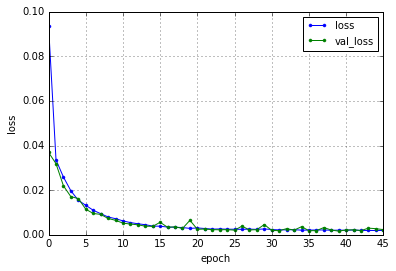

hiden node = 16
-edim=16-Window=512-Overlap=32-Adam
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.1194 - val_loss: 0.0358
Epoch 2/50
1s - loss: 0.0322 - val_loss: 0.0320
Epoch 3/50
1s - loss: 0.0236 - val_loss: 0.0227
Epoch 4/50
1s - loss: 0.0169 - val_loss: 0.0138
Epoch 5/50
1s - loss: 0.0130 - val_loss: 0.0108
Epoch 6/50
1s - loss: 0.0113 - val_loss: 0.0092
Epoch 7/50
1s - loss: 0.0094 - val_loss: 0.0079
Epoch 8/50
1s - loss: 0.0078 - val_loss: 0.0068
Epoch 9/50
1s - loss: 0.0071 - val_loss: 0.0063
Epoch 10/50
1s - loss: 0.0066 - val_loss: 0.0110
Epoch 11/50
1s - loss: 0.0062 - val_loss: 0.0076
Epoch 12/50
1s - loss: 0.0055 - val_loss: 0.0048
Epoch 13/50
1s - loss: 0.0050 - val_loss: 0.0046
Epoch 14/50
1s - loss: 0.0048 - val_loss: 0.0046
Epoch 15/50
1s - loss: 0.0045 - val_loss: 0.0036
Epoch 16/50
1s - loss: 0.0041 - val_loss: 0.0061
Epoch 17/50
1s - loss: 0.0040 - val_loss: 0.0039
Epoch 18/50
1s - loss: 0.0038 - val_loss: 0.0030
Epoch 19/50
1s - loss: 0.00

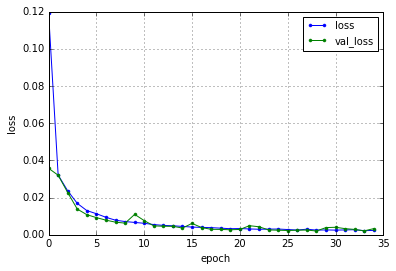

hiden node = 16
-edim=16-Window=512-Overlap=32-Adagrad
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
1s - loss: 0.0696 - val_loss: 0.0453
Epoch 2/50
1s - loss: 0.0356 - val_loss: 0.0294
Epoch 3/50
1s - loss: 0.0287 - val_loss: 0.0234
Epoch 4/50
1s - loss: 0.0239 - val_loss: 0.0197
Epoch 5/50
1s - loss: 0.0201 - val_loss: 0.0254
Epoch 6/50
1s - loss: 0.0176 - val_loss: 0.0158
Epoch 7/50
1s - loss: 0.0162 - val_loss: 0.0149
Epoch 8/50
1s - loss: 0.0148 - val_loss: 0.0133
Epoch 9/50
1s - loss: 0.0138 - val_loss: 0.0170
Epoch 10/50
1s - loss: 0.0130 - val_loss: 0.0113
Epoch 11/50
0s - loss: 0.0124 - val_loss: 0.0153
Epoch 12/50
0s - loss: 0.0117 - val_loss: 0.0138
Epoch 13/50
1s - loss: 0.0112 - val_loss: 0.0108
Epoch 14/50
1s - loss: 0.0106 - val_loss: 0.0102
Epoch 15/50
1s - loss: 0.0106 - val_loss: 0.0092
Epoch 16/50
1s - loss: 0.0098 - val_loss: 0.0087
Epoch 17/50
1s - loss: 0.0095 - val_loss: 0.0084
Epoch 18/50
1s - loss: 0.0095 - val_loss: 0.0081
Epoch 19/50
0s - loss: 0

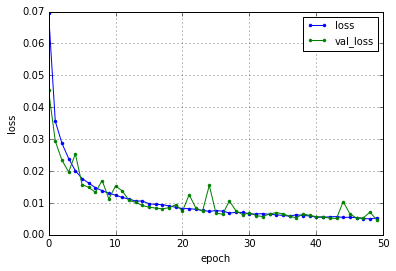

hiden node = 16
-edim=16-Window=512-Overlap=32-RMSprop
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
1s - loss: 0.1016 - val_loss: 0.0408
Epoch 2/50
1s - loss: 0.0351 - val_loss: 0.0276
Epoch 3/50
1s - loss: 0.0284 - val_loss: 0.0242
Epoch 4/50
1s - loss: 0.0245 - val_loss: 0.0154
Epoch 5/50
1s - loss: 0.0231 - val_loss: 0.0215
Epoch 6/50
1s - loss: 0.0219 - val_loss: 0.0178
Epoch 7/50
1s - loss: 0.0216 - val_loss: 0.0230
Epoch 8/50
1s - loss: 0.0207 - val_loss: 0.0326
Epoch 9/50
1s - loss: 0.0205 - val_loss: 0.0170
Epoch 10/50
1s - loss: 0.0198 - val_loss: 0.0259


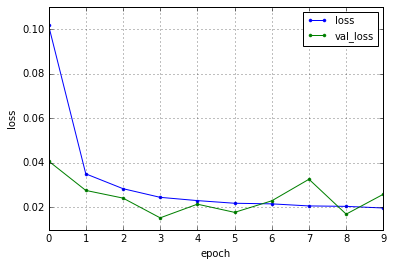

hiden node = 16
-edim=16-Window=512-Overlap=32-Nadam
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0940 - val_loss: 0.0399
Epoch 2/50
1s - loss: 0.0404 - val_loss: 0.0294
Epoch 3/50
1s - loss: 0.0291 - val_loss: 0.0216
Epoch 4/50
1s - loss: 0.0271 - val_loss: 0.0183
Epoch 5/50
1s - loss: 0.0244 - val_loss: 0.0194
Epoch 6/50
1s - loss: 0.0223 - val_loss: 0.0336
Epoch 7/50
1s - loss: 0.0218 - val_loss: 0.0199
Epoch 8/50
1s - loss: 0.0189 - val_loss: 0.0131
Epoch 9/50
0s - loss: 0.0172 - val_loss: 0.0162
Epoch 10/50
1s - loss: 0.0165 - val_loss: 0.0177
Epoch 11/50
1s - loss: 0.0147 - val_loss: 0.0134
Epoch 12/50
1s - loss: 0.0143 - val_loss: 0.0098
Epoch 13/50
1s - loss: 0.0140 - val_loss: 0.0161
Epoch 14/50
1s - loss: 0.0129 - val_loss: 0.0093
Epoch 15/50
1s - loss: 0.0121 - val_loss: 0.0110
Epoch 16/50
1s - loss: 0.0116 - val_loss: 0.0097
Epoch 17/50
1s - loss: 0.0122 - val_loss: 0.0075
Epoch 18/50
0s - loss: 0.0111 - val_loss: 0.0069
Epoch 19/50
1s - loss: 0.0

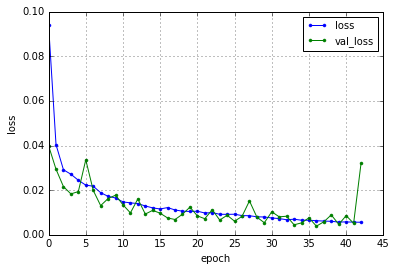

AccX is registed now
Build Complete
(254742,)
windowData's num =7929
SourceData's aborting data = 22
window shape is (7929, 1024, 1)
hiden node = 16
-edim=16-Window=1024-Overlap=32-SGD
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.7373 - val_loss: 0.7092
Epoch 2/50
0s - loss: 0.6762 - val_loss: 0.6402
Epoch 3/50
0s - loss: 0.6036 - val_loss: 0.5678
Epoch 4/50
0s - loss: 0.5350 - val_loss: 0.5033
Epoch 5/50
0s - loss: 0.4748 - val_loss: 0.4473
Epoch 6/50
0s - loss: 0.4225 - val_loss: 0.3988
Epoch 7/50
0s - loss: 0.3774 - val_loss: 0.3568
Epoch 8/50
0s - loss: 0.3384 - val_loss: 0.3207
Epoch 9/50
0s - loss: 0.3047 - val_loss: 0.2894
Epoch 10/50
0s - loss: 0.2756 - val_loss: 0.2624
Epoch 11/50
0s - loss: 0.2504 - val_loss: 0.2389
Epoch 12/50
0s - loss: 0.2285 - val_loss: 0.2185
Epoch 13/50
0s - loss: 0.2094 - val_loss: 0.2006
Epoch 14/50
0s - loss: 0.1927 - val_loss: 0.1850
Epoch 15/50
0s - loss: 0.1779 - val_loss: 0.1711
Epoch 16/50
0s - loss: 0.1650 - val_loss:

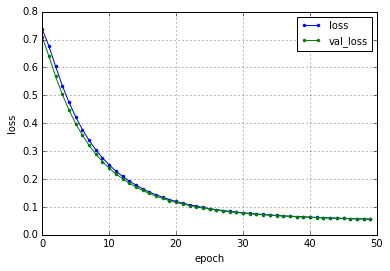

hiden node = 16
-edim=16-Window=1024-Overlap=32-Adadelta
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.1918 - val_loss: 0.0616
Epoch 2/50
0s - loss: 0.0502 - val_loss: 0.0467
Epoch 3/50
0s - loss: 0.0453 - val_loss: 0.0439
Epoch 4/50
0s - loss: 0.0444 - val_loss: 0.0398
Epoch 5/50
0s - loss: 0.0426 - val_loss: 0.0397
Epoch 6/50
0s - loss: 0.0411 - val_loss: 0.0381
Epoch 7/50
0s - loss: 0.0398 - val_loss: 0.0410
Epoch 8/50
0s - loss: 0.0382 - val_loss: 0.0339
Epoch 9/50
0s - loss: 0.0379 - val_loss: 0.0360
Epoch 10/50
0s - loss: 0.0360 - val_loss: 0.0369
Epoch 11/50
0s - loss: 0.0350 - val_loss: 0.0450
Epoch 12/50
0s - loss: 0.0337 - val_loss: 0.0309
Epoch 13/50
0s - loss: 0.0331 - val_loss: 0.0366
Epoch 14/50
0s - loss: 0.0312 - val_loss: 0.0399
Epoch 15/50
0s - loss: 0.0303 - val_loss: 0.0388
Epoch 16/50
0s - loss: 0.0290 - val_loss: 0.0255
Epoch 17/50
0s - loss: 0.0282 - val_loss: 0.0264
Epoch 18/50
0s - loss: 0.0276 - val_loss: 0.0245
Epoch 19/50
0s - loss:

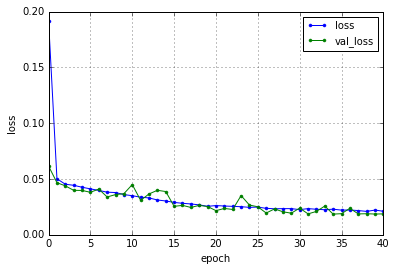

hiden node = 16
-edim=16-Window=1024-Overlap=32-Adamax
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.1057 - val_loss: 0.0439
Epoch 2/50
0s - loss: 0.0411 - val_loss: 0.0393
Epoch 3/50
0s - loss: 0.0365 - val_loss: 0.0328
Epoch 4/50
0s - loss: 0.0303 - val_loss: 0.0274
Epoch 5/50
0s - loss: 0.0235 - val_loss: 0.0225
Epoch 6/50
0s - loss: 0.0199 - val_loss: 0.0177
Epoch 7/50
0s - loss: 0.0176 - val_loss: 0.0154
Epoch 8/50
0s - loss: 0.0151 - val_loss: 0.0150
Epoch 9/50
0s - loss: 0.0128 - val_loss: 0.0111
Epoch 10/50
0s - loss: 0.0113 - val_loss: 0.0099
Epoch 11/50
0s - loss: 0.0104 - val_loss: 0.0094
Epoch 12/50
0s - loss: 0.0095 - val_loss: 0.0114
Epoch 13/50
0s - loss: 0.0090 - val_loss: 0.0077
Epoch 14/50
1s - loss: 0.0080 - val_loss: 0.0081
Epoch 15/50
1s - loss: 0.0075 - val_loss: 0.0068
Epoch 16/50
1s - loss: 0.0070 - val_loss: 0.0062
Epoch 17/50
1s - loss: 0.0071 - val_loss: 0.0058
Epoch 18/50
1s - loss: 0.0069 - val_loss: 0.0056
Epoch 19/50
1s - loss: 0

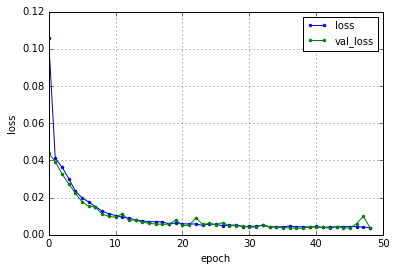

hiden node = 16
-edim=16-Window=1024-Overlap=32-Adam
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.1243 - val_loss: 0.0428
Epoch 2/50
0s - loss: 0.0406 - val_loss: 0.0376
Epoch 3/50
0s - loss: 0.0332 - val_loss: 0.0299
Epoch 4/50
0s - loss: 0.0238 - val_loss: 0.0204
Epoch 5/50
0s - loss: 0.0207 - val_loss: 0.0175
Epoch 6/50
0s - loss: 0.0173 - val_loss: 0.0144
Epoch 7/50
0s - loss: 0.0148 - val_loss: 0.0138
Epoch 8/50
0s - loss: 0.0127 - val_loss: 0.0108
Epoch 9/50
0s - loss: 0.0135 - val_loss: 0.0100
Epoch 10/50
0s - loss: 0.0114 - val_loss: 0.0105
Epoch 11/50
0s - loss: 0.0099 - val_loss: 0.0091
Epoch 12/50
1s - loss: 0.0095 - val_loss: 0.0078
Epoch 13/50
0s - loss: 0.0090 - val_loss: 0.0084
Epoch 14/50
1s - loss: 0.0085 - val_loss: 0.0122
Epoch 15/50
1s - loss: 0.0083 - val_loss: 0.0079
Epoch 16/50
0s - loss: 0.0074 - val_loss: 0.0069
Epoch 17/50
1s - loss: 0.0093 - val_loss: 0.0073
Epoch 18/50
0s - loss: 0.0069 - val_loss: 0.0061
Epoch 19/50
1s - loss: 0.0

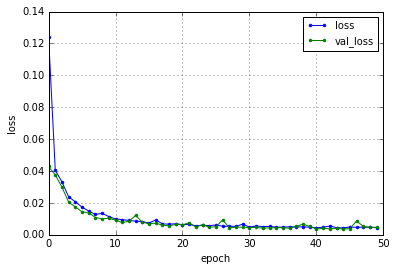

hiden node = 16
-edim=16-Window=1024-Overlap=32-Adagrad
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0928 - val_loss: 0.0457
Epoch 2/50
0s - loss: 0.0451 - val_loss: 0.0395
Epoch 3/50
0s - loss: 0.0404 - val_loss: 0.0366
Epoch 4/50
0s - loss: 0.0373 - val_loss: 0.0616
Epoch 5/50
0s - loss: 0.0333 - val_loss: 0.0290
Epoch 6/50
0s - loss: 0.0308 - val_loss: 0.0269
Epoch 7/50
0s - loss: 0.0273 - val_loss: 0.0336
Epoch 8/50
0s - loss: 0.0261 - val_loss: 0.0230
Epoch 9/50
0s - loss: 0.0237 - val_loss: 0.0336
Epoch 10/50
0s - loss: 0.0231 - val_loss: 0.0218
Epoch 11/50
0s - loss: 0.0215 - val_loss: 0.0230
Epoch 12/50
0s - loss: 0.0205 - val_loss: 0.0181
Epoch 13/50
1s - loss: 0.0198 - val_loss: 0.0229
Epoch 14/50
1s - loss: 0.0189 - val_loss: 0.0164
Epoch 15/50
0s - loss: 0.0182 - val_loss: 0.0173
Epoch 16/50
0s - loss: 0.0183 - val_loss: 0.0153
Epoch 17/50
0s - loss: 0.0169 - val_loss: 0.0150
Epoch 18/50
0s - loss: 0.0168 - val_loss: 0.0143
Epoch 19/50
0s - loss: 

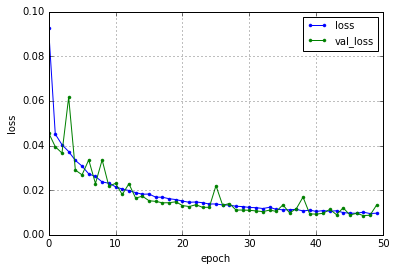

hiden node = 16
-edim=16-Window=1024-Overlap=32-RMSprop
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.1155 - val_loss: 0.0469
Epoch 2/50
0s - loss: 0.0532 - val_loss: 0.0376
Epoch 3/50
0s - loss: 0.0475 - val_loss: 0.0347
Epoch 4/50
0s - loss: 0.0416 - val_loss: 0.0392
Epoch 5/50
0s - loss: 0.0384 - val_loss: 0.0273
Epoch 6/50
0s - loss: 0.0368 - val_loss: 0.0281
Epoch 7/50
0s - loss: 0.0347 - val_loss: 0.0308
Epoch 8/50
0s - loss: 0.0344 - val_loss: 0.0230
Epoch 9/50
0s - loss: 0.0332 - val_loss: 0.0413
Epoch 10/50
0s - loss: 0.0327 - val_loss: 0.0337
Epoch 11/50
0s - loss: 0.0315 - val_loss: 0.0730
Epoch 12/50
0s - loss: 0.0314 - val_loss: 0.0255
Epoch 13/50
0s - loss: 0.0306 - val_loss: 0.0486
Epoch 14/50
0s - loss: 0.0301 - val_loss: 0.0271


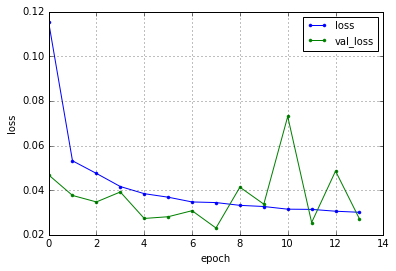

hiden node = 16
-edim=16-Window=1024-Overlap=32-Nadam
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
1s - loss: 0.1266 - val_loss: 0.0614
Epoch 2/50
1s - loss: 0.0654 - val_loss: 0.0634
Epoch 3/50
1s - loss: 0.0589 - val_loss: 0.0431
Epoch 4/50
0s - loss: 0.0498 - val_loss: 0.0405
Epoch 5/50
0s - loss: 0.0489 - val_loss: 0.0414
Epoch 6/50
0s - loss: 0.0460 - val_loss: 0.0470
Epoch 7/50
0s - loss: 0.0456 - val_loss: 0.0352
Epoch 8/50
0s - loss: 0.0480 - val_loss: 0.0341
Epoch 9/50
0s - loss: 0.0387 - val_loss: 0.0295
Epoch 10/50
0s - loss: 0.0506 - val_loss: 0.0355
Epoch 11/50
0s - loss: 0.0326 - val_loss: 0.0323
Epoch 12/50
0s - loss: 0.0404 - val_loss: 0.0459
Epoch 13/50
0s - loss: 0.0290 - val_loss: 0.0589
Epoch 14/50
0s - loss: 0.0300 - val_loss: 0.0231
Epoch 15/50
0s - loss: 0.0268 - val_loss: 0.0316
Epoch 16/50
0s - loss: 0.0224 - val_loss: 0.0185
Epoch 17/50
0s - loss: 0.0233 - val_loss: 0.0175
Epoch 18/50
0s - loss: 0.0304 - val_loss: 0.0229
Epoch 19/50
0s - loss: 0.

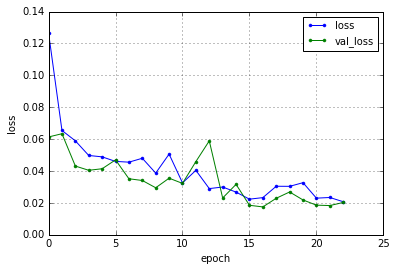

AccX is registed now
Build Complete
(254742,)
windowData's num =7897
SourceData's aborting data = 22
window shape is (7897, 2048, 1)
hiden node = 16
-edim=16-Window=2048-Overlap=32-SGD
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.7461 - val_loss: 0.7327
Epoch 2/50
1s - loss: 0.7158 - val_loss: 0.6976
Epoch 3/50
1s - loss: 0.6787 - val_loss: 0.6593
Epoch 4/50
1s - loss: 0.6400 - val_loss: 0.6208
Epoch 5/50
1s - loss: 0.6023 - val_loss: 0.5842
Epoch 6/50
1s - loss: 0.5670 - val_loss: 0.5500
Epoch 7/50
1s - loss: 0.5340 - val_loss: 0.5182
Epoch 8/50
1s - loss: 0.5034 - val_loss: 0.4887
Epoch 9/50
1s - loss: 0.4749 - val_loss: 0.4613
Epoch 10/50
1s - loss: 0.4485 - val_loss: 0.4359
Epoch 11/50
1s - loss: 0.4240 - val_loss: 0.4123
Epoch 12/50
1s - loss: 0.4013 - val_loss: 0.3904
Epoch 13/50
1s - loss: 0.3802 - val_loss: 0.3701
Epoch 14/50
1s - loss: 0.3606 - val_loss: 0.3512
Epoch 15/50
1s - loss: 0.3424 - val_loss: 0.3337
Epoch 16/50
1s - loss: 0.3255 - val_loss:

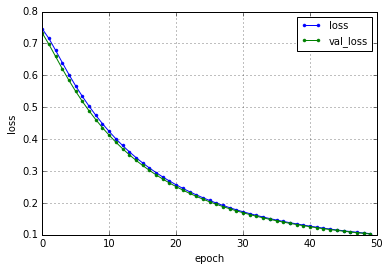

hiden node = 16
-edim=16-Window=2048-Overlap=32-Adadelta
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.2371 - val_loss: 0.0746
Epoch 2/50
1s - loss: 0.0653 - val_loss: 0.0564
Epoch 3/50
1s - loss: 0.0567 - val_loss: 0.0552
Epoch 4/50
1s - loss: 0.0542 - val_loss: 0.0492
Epoch 5/50
1s - loss: 0.0519 - val_loss: 0.0500
Epoch 6/50
1s - loss: 0.0518 - val_loss: 0.0606
Epoch 7/50
1s - loss: 0.0498 - val_loss: 0.0465
Epoch 8/50
1s - loss: 0.0498 - val_loss: 0.0513
Epoch 9/50
1s - loss: 0.0481 - val_loss: 0.0473
Epoch 10/50
1s - loss: 0.0477 - val_loss: 0.0436
Epoch 11/50
1s - loss: 0.0473 - val_loss: 0.0424
Epoch 12/50
2s - loss: 0.0474 - val_loss: 0.0579
Epoch 13/50
1s - loss: 0.0454 - val_loss: 0.0489
Epoch 14/50
1s - loss: 0.0456 - val_loss: 0.0410
Epoch 15/50
1s - loss: 0.0445 - val_loss: 0.0451
Epoch 16/50
1s - loss: 0.0442 - val_loss: 0.0402
Epoch 17/50
1s - loss: 0.0438 - val_loss: 0.0448
Epoch 18/50
1s - loss: 0.0438 - val_loss: 0.0389
Epoch 19/50
1s - loss:

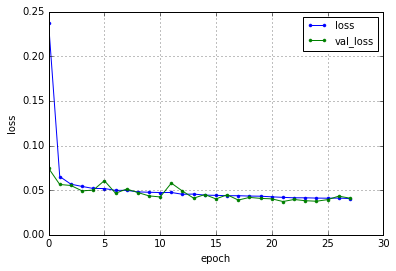

hiden node = 16
-edim=16-Window=2048-Overlap=32-Adamax
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
2s - loss: 0.1119 - val_loss: 0.0537
Epoch 2/50
1s - loss: 0.0486 - val_loss: 0.0457
Epoch 3/50
2s - loss: 0.0429 - val_loss: 0.0401
Epoch 4/50
2s - loss: 0.0389 - val_loss: 0.0386
Epoch 5/50
2s - loss: 0.0329 - val_loss: 0.0289
Epoch 6/50
1s - loss: 0.0283 - val_loss: 0.0252
Epoch 7/50
2s - loss: 0.0245 - val_loss: 0.0221
Epoch 8/50
1s - loss: 0.0223 - val_loss: 0.0217
Epoch 9/50
2s - loss: 0.0207 - val_loss: 0.0185
Epoch 10/50
1s - loss: 0.0190 - val_loss: 0.0225
Epoch 11/50
1s - loss: 0.0171 - val_loss: 0.0154
Epoch 12/50
1s - loss: 0.0157 - val_loss: 0.0198
Epoch 13/50
1s - loss: 0.0146 - val_loss: 0.0126
Epoch 14/50
1s - loss: 0.0139 - val_loss: 0.0123
Epoch 15/50
1s - loss: 0.0129 - val_loss: 0.0125
Epoch 16/50
1s - loss: 0.0126 - val_loss: 0.0132
Epoch 17/50
1s - loss: 0.0123 - val_loss: 0.0105
Epoch 18/50
1s - loss: 0.0117 - val_loss: 0.0168
Epoch 19/50
1s - loss: 0

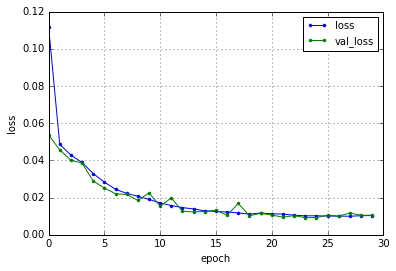

hiden node = 16
-edim=16-Window=2048-Overlap=32-Adam
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.1343 - val_loss: 0.0640
Epoch 2/50
2s - loss: 0.0521 - val_loss: 0.0439
Epoch 3/50
2s - loss: 0.0414 - val_loss: 0.0369
Epoch 4/50
2s - loss: 0.0379 - val_loss: 0.0322
Epoch 5/50
1s - loss: 0.0344 - val_loss: 0.0322
Epoch 6/50
1s - loss: 0.0296 - val_loss: 0.0258
Epoch 7/50
2s - loss: 0.0278 - val_loss: 0.0303
Epoch 8/50
2s - loss: 0.0241 - val_loss: 0.0212
Epoch 9/50
2s - loss: 0.0224 - val_loss: 0.0196
Epoch 10/50
1s - loss: 0.0212 - val_loss: 0.0308
Epoch 11/50
2s - loss: 0.0195 - val_loss: 0.0177
Epoch 12/50
1s - loss: 0.0185 - val_loss: 0.0156
Epoch 13/50
1s - loss: 0.0178 - val_loss: 0.0161
Epoch 14/50
1s - loss: 0.0177 - val_loss: 0.0177
Epoch 15/50
1s - loss: 0.0185 - val_loss: 0.0147
Epoch 16/50
1s - loss: 0.0156 - val_loss: 0.0185
Epoch 17/50
1s - loss: 0.0154 - val_loss: 0.0147
Epoch 18/50
1s - loss: 0.0160 - val_loss: 0.0122
Epoch 19/50
1s - loss: 0.0

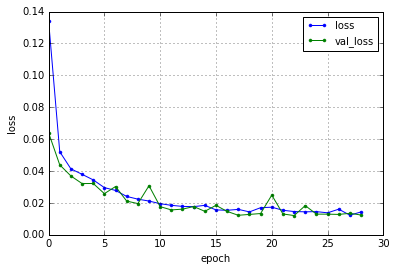

hiden node = 16
-edim=16-Window=2048-Overlap=32-Adagrad
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.1266 - val_loss: 0.0742
Epoch 2/50
1s - loss: 0.0719 - val_loss: 0.0630
Epoch 3/50
1s - loss: 0.0607 - val_loss: 0.0555
Epoch 4/50
1s - loss: 0.0501 - val_loss: 0.0761
Epoch 5/50
1s - loss: 0.0438 - val_loss: 0.0492
Epoch 6/50
1s - loss: 0.0402 - val_loss: 0.0357
Epoch 7/50
1s - loss: 0.0385 - val_loss: 0.0384
Epoch 8/50
1s - loss: 0.0377 - val_loss: 0.0328
Epoch 9/50
1s - loss: 0.0344 - val_loss: 0.0317
Epoch 10/50
1s - loss: 0.0333 - val_loss: 0.0294
Epoch 11/50
1s - loss: 0.0321 - val_loss: 0.0329
Epoch 12/50
1s - loss: 0.0310 - val_loss: 0.0279
Epoch 13/50
1s - loss: 0.0310 - val_loss: 0.0287
Epoch 14/50
1s - loss: 0.0298 - val_loss: 0.0280
Epoch 15/50
1s - loss: 0.0290 - val_loss: 0.0387
Epoch 16/50
1s - loss: 0.0282 - val_loss: 0.0278
Epoch 17/50
1s - loss: 0.0278 - val_loss: 0.0315
Epoch 18/50
1s - loss: 0.0270 - val_loss: 0.0248
Epoch 19/50
1s - loss: 

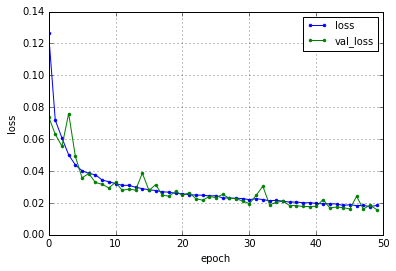

hiden node = 16
-edim=16-Window=2048-Overlap=32-RMSprop
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
2s - loss: 0.1321 - val_loss: 0.0893
Epoch 2/50
1s - loss: 0.0750 - val_loss: 0.0882
Epoch 3/50
1s - loss: 0.0684 - val_loss: 0.0758
Epoch 4/50
1s - loss: 0.0625 - val_loss: 0.0506
Epoch 5/50
1s - loss: 0.0597 - val_loss: 0.0517
Epoch 6/50
1s - loss: 0.0558 - val_loss: 0.0445
Epoch 7/50
1s - loss: 0.0523 - val_loss: 0.0435
Epoch 8/50
1s - loss: 0.0506 - val_loss: 0.0619
Epoch 9/50
1s - loss: 0.0484 - val_loss: 0.0473
Epoch 10/50
1s - loss: 0.0472 - val_loss: 0.0510
Epoch 11/50
1s - loss: 0.0461 - val_loss: 0.0524
Epoch 12/50
1s - loss: 0.0456 - val_loss: 0.0366
Epoch 13/50
1s - loss: 0.0442 - val_loss: 0.0449
Epoch 14/50
1s - loss: 0.0438 - val_loss: 0.0370
Epoch 15/50
1s - loss: 0.0435 - val_loss: 0.0354
Epoch 16/50
1s - loss: 0.0422 - val_loss: 0.0332
Epoch 17/50
1s - loss: 0.0415 - val_loss: 0.0347
Epoch 18/50
1s - loss: 0.0416 - val_loss: 0.0667
Epoch 19/50
1s - loss: 

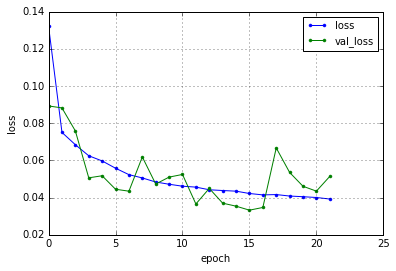

hiden node = 16
-edim=16-Window=2048-Overlap=32-Nadam
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.1446 - val_loss: 0.1022
Epoch 2/50
1s - loss: 0.0877 - val_loss: 0.0827
Epoch 3/50
1s - loss: 0.0837 - val_loss: 0.0808
Epoch 4/50
1s - loss: 0.0795 - val_loss: 0.0758
Epoch 5/50
1s - loss: 0.0728 - val_loss: 0.0733
Epoch 6/50
2s - loss: 0.0668 - val_loss: 0.0604
Epoch 7/50
1s - loss: 0.0654 - val_loss: 0.0727
Epoch 8/50
1s - loss: 0.0649 - val_loss: 0.0592
Epoch 9/50
1s - loss: 0.0615 - val_loss: 0.0574
Epoch 10/50
1s - loss: 0.0558 - val_loss: 0.0633
Epoch 11/50
1s - loss: 0.0622 - val_loss: 0.0717
Epoch 12/50
1s - loss: 0.0600 - val_loss: 0.0606
Epoch 13/50
2s - loss: 0.0506 - val_loss: 0.0534
Epoch 14/50
1s - loss: 0.0535 - val_loss: 0.0555
Epoch 15/50
1s - loss: 0.0616 - val_loss: 0.0759
Epoch 16/50
1s - loss: 0.0516 - val_loss: 0.0408
Epoch 17/50
1s - loss: 0.0482 - val_loss: 0.0417
Epoch 18/50
1s - loss: 0.0456 - val_loss: 0.0535
Epoch 19/50
1s - loss: 0.

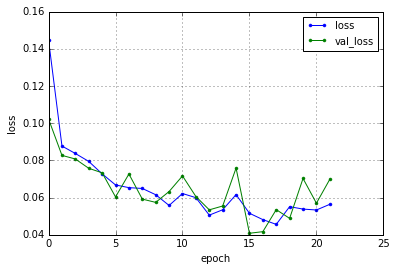

AccX is registed now
Build Complete
(254742,)
windowData's num =7833
SourceData's aborting data = 22
window shape is (7833, 4096, 1)
hiden node = 16
-edim=16-Window=4096-Overlap=32-SGD
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.7507 - val_loss: 0.7424
Epoch 2/50
3s - loss: 0.7336 - val_loss: 0.7240
Epoch 3/50
2s - loss: 0.7138 - val_loss: 0.7034
Epoch 4/50
2s - loss: 0.6929 - val_loss: 0.6824
Epoch 5/50
2s - loss: 0.6722 - val_loss: 0.6620
Epoch 6/50
2s - loss: 0.6521 - val_loss: 0.6422
Epoch 7/50
2s - loss: 0.6327 - val_loss: 0.6231
Epoch 8/50
3s - loss: 0.6139 - val_loss: 0.6047
Epoch 9/50
3s - loss: 0.5958 - val_loss: 0.5870
Epoch 10/50
2s - loss: 0.5784 - val_loss: 0.5699
Epoch 11/50
3s - loss: 0.5616 - val_loss: 0.5534
Epoch 12/50
2s - loss: 0.5454 - val_loss: 0.5375
Epoch 13/50
3s - loss: 0.5299 - val_loss: 0.5222
Epoch 14/50
3s - loss: 0.5149 - val_loss: 0.5075
Epoch 15/50
3s - loss: 0.5005 - val_loss: 0.4934
Epoch 16/50
2s - loss: 0.4866 - val_loss:

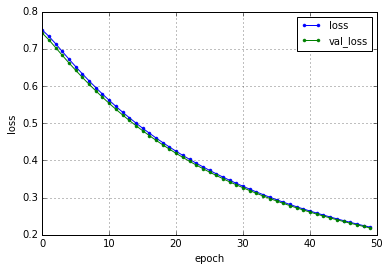

hiden node = 16
-edim=16-Window=4096-Overlap=32-Adadelta
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
3s - loss: 0.3131 - val_loss: 0.1240
Epoch 2/50
3s - loss: 0.0958 - val_loss: 0.1058
Epoch 3/50
3s - loss: 0.0762 - val_loss: 0.0705
Epoch 4/50
4s - loss: 0.0722 - val_loss: 0.0670
Epoch 5/50
3s - loss: 0.0677 - val_loss: 0.0734
Epoch 6/50
2s - loss: 0.0667 - val_loss: 0.0614
Epoch 7/50
2s - loss: 0.0644 - val_loss: 0.0598
Epoch 8/50
4s - loss: 0.0625 - val_loss: 0.0740
Epoch 9/50
2s - loss: 0.0618 - val_loss: 0.0638
Epoch 10/50
2s - loss: 0.0604 - val_loss: 0.0567
Epoch 11/50
3s - loss: 0.0593 - val_loss: 0.0659
Epoch 12/50
3s - loss: 0.0570 - val_loss: 0.0555
Epoch 13/50
3s - loss: 0.0567 - val_loss: 0.0523
Epoch 14/50
3s - loss: 0.0562 - val_loss: 0.0516
Epoch 15/50
3s - loss: 0.0554 - val_loss: 0.0652
Epoch 16/50
3s - loss: 0.0541 - val_loss: 0.0539
Epoch 17/50
2s - loss: 0.0539 - val_loss: 0.0497
Epoch 18/50
2s - loss: 0.0532 - val_loss: 0.0504
Epoch 19/50
2s - loss:

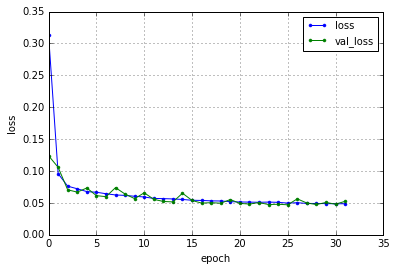

hiden node = 16
-edim=16-Window=4096-Overlap=32-Adamax
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
4s - loss: 0.1278 - val_loss: 0.0702
Epoch 2/50
3s - loss: 0.0621 - val_loss: 0.0537
Epoch 3/50
3s - loss: 0.0517 - val_loss: 0.0533
Epoch 4/50
3s - loss: 0.0473 - val_loss: 0.0466
Epoch 5/50
3s - loss: 0.0422 - val_loss: 0.0413
Epoch 6/50
3s - loss: 0.0384 - val_loss: 0.0362
Epoch 7/50
3s - loss: 0.0350 - val_loss: 0.0339
Epoch 8/50
2s - loss: 0.0311 - val_loss: 0.0281
Epoch 9/50
2s - loss: 0.0291 - val_loss: 0.0274
Epoch 10/50
3s - loss: 0.0272 - val_loss: 0.0242
Epoch 11/50
4s - loss: 0.0256 - val_loss: 0.0245
Epoch 12/50
3s - loss: 0.0259 - val_loss: 0.0242
Epoch 13/50
3s - loss: 0.0246 - val_loss: 0.0243
Epoch 14/50
2s - loss: 0.0241 - val_loss: 0.0313
Epoch 15/50
2s - loss: 0.0244 - val_loss: 0.0219
Epoch 16/50
3s - loss: 0.0235 - val_loss: 0.0209
Epoch 17/50
3s - loss: 0.0215 - val_loss: 0.0197
Epoch 18/50
2s - loss: 0.0218 - val_loss: 0.0339
Epoch 19/50
2s - loss: 0

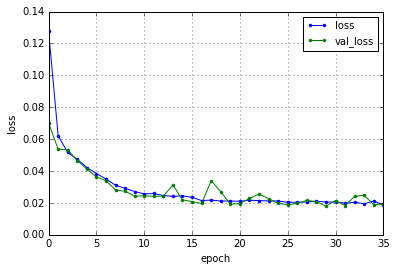

hiden node = 16
-edim=16-Window=4096-Overlap=32-Adam
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
3s - loss: 0.1610 - val_loss: 0.0828
Epoch 2/50
3s - loss: 0.0795 - val_loss: 0.0802
Epoch 3/50
3s - loss: 0.0707 - val_loss: 0.0671
Epoch 4/50
3s - loss: 0.0636 - val_loss: 0.0612
Epoch 5/50
3s - loss: 0.0597 - val_loss: 0.0606
Epoch 6/50
3s - loss: 0.0588 - val_loss: 0.0580
Epoch 7/50
2s - loss: 0.0563 - val_loss: 0.0525
Epoch 8/50
3s - loss: 0.0551 - val_loss: 0.0541
Epoch 9/50
3s - loss: 0.0526 - val_loss: 0.0516
Epoch 10/50
3s - loss: 0.0515 - val_loss: 0.0539
Epoch 11/50
2s - loss: 0.0508 - val_loss: 0.0477
Epoch 12/50
2s - loss: 0.0490 - val_loss: 0.0470
Epoch 13/50
3s - loss: 0.0472 - val_loss: 0.0458
Epoch 14/50
2s - loss: 0.0461 - val_loss: 0.0445
Epoch 15/50
2s - loss: 0.0455 - val_loss: 0.0492
Epoch 16/50
2s - loss: 0.0460 - val_loss: 0.0436
Epoch 17/50
2s - loss: 0.0430 - val_loss: 0.0396
Epoch 18/50
2s - loss: 0.0453 - val_loss: 0.0415
Epoch 19/50
3s - loss: 0.0

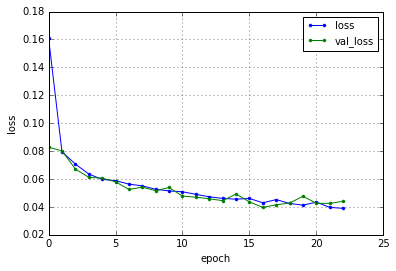

hiden node = 16
-edim=16-Window=4096-Overlap=32-Adagrad
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.1326 - val_loss: 0.0976
Epoch 2/50
2s - loss: 0.0941 - val_loss: 0.0866
Epoch 3/50
2s - loss: 0.0822 - val_loss: 0.0771
Epoch 4/50
2s - loss: 0.0746 - val_loss: 0.0715
Epoch 5/50
2s - loss: 0.0689 - val_loss: 0.0659
Epoch 6/50
3s - loss: 0.0663 - val_loss: 0.0633
Epoch 7/50
3s - loss: 0.0641 - val_loss: 0.0638
Epoch 8/50
3s - loss: 0.0629 - val_loss: 0.0642
Epoch 9/50
3s - loss: 0.0605 - val_loss: 0.0615
Epoch 10/50
3s - loss: 0.0598 - val_loss: 0.0581
Epoch 11/50
3s - loss: 0.0584 - val_loss: 0.0575
Epoch 12/50
3s - loss: 0.0575 - val_loss: 0.0593
Epoch 13/50
2s - loss: 0.0569 - val_loss: 0.0560
Epoch 14/50
2s - loss: 0.0561 - val_loss: 0.0559
Epoch 15/50
2s - loss: 0.0554 - val_loss: 0.0550
Epoch 16/50
3s - loss: 0.0547 - val_loss: 0.0557
Epoch 17/50
3s - loss: 0.0541 - val_loss: 0.0540
Epoch 18/50
3s - loss: 0.0536 - val_loss: 0.0535
Epoch 19/50
2s - loss: 

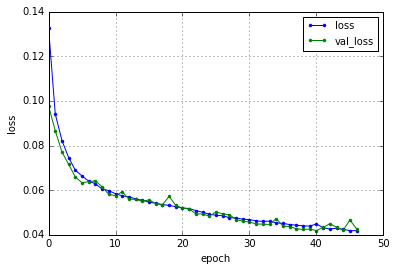

hiden node = 16
-edim=16-Window=4096-Overlap=32-RMSprop
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
3s - loss: 0.1637 - val_loss: 0.1061
Epoch 2/50
3s - loss: 0.1027 - val_loss: 0.0909
Epoch 3/50
2s - loss: 0.0916 - val_loss: 0.0760
Epoch 4/50
3s - loss: 0.0792 - val_loss: 0.0707
Epoch 5/50
3s - loss: 0.0715 - val_loss: 0.0736
Epoch 6/50
3s - loss: 0.0656 - val_loss: 0.0627
Epoch 7/50
3s - loss: 0.0621 - val_loss: 0.0602
Epoch 8/50
2s - loss: 0.0595 - val_loss: 0.0567
Epoch 9/50
3s - loss: 0.0572 - val_loss: 0.0537
Epoch 10/50
3s - loss: 0.0564 - val_loss: 0.0552
Epoch 11/50
3s - loss: 0.0553 - val_loss: 0.0523
Epoch 12/50
3s - loss: 0.0546 - val_loss: 0.0517
Epoch 13/50
3s - loss: 0.0536 - val_loss: 0.0533
Epoch 14/50
3s - loss: 0.0535 - val_loss: 0.0595
Epoch 15/50
3s - loss: 0.0530 - val_loss: 0.0518
Epoch 16/50
2s - loss: 0.0528 - val_loss: 0.0562
Epoch 17/50
4s - loss: 0.0527 - val_loss: 0.0514
Epoch 18/50
3s - loss: 0.0515 - val_loss: 0.0595
Epoch 19/50
2s - loss: 

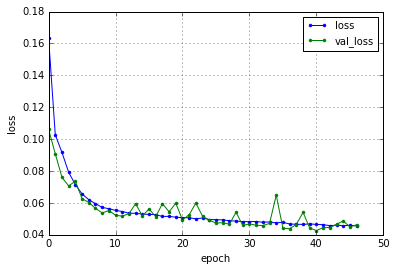

hiden node = 16
-edim=16-Window=4096-Overlap=32-Nadam
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.1650 - val_loss: 0.1211
Epoch 2/50
2s - loss: 0.1068 - val_loss: 0.0945
Epoch 3/50
3s - loss: 0.0976 - val_loss: 0.0964
Epoch 4/50
2s - loss: 0.0912 - val_loss: 0.0879
Epoch 5/50
3s - loss: 0.0895 - val_loss: 0.0867
Epoch 6/50
3s - loss: 0.0857 - val_loss: 0.0838
Epoch 7/50
2s - loss: 0.0832 - val_loss: 0.0773
Epoch 8/50
2s - loss: 0.0785 - val_loss: 0.0759
Epoch 9/50
2s - loss: 0.0783 - val_loss: 0.0792
Epoch 10/50
2s - loss: 0.0783 - val_loss: 0.0735
Epoch 11/50
2s - loss: 0.0763 - val_loss: 0.0735
Epoch 12/50
2s - loss: 0.0764 - val_loss: 0.0737
Epoch 13/50
2s - loss: 0.0742 - val_loss: 0.0738
Epoch 14/50
2s - loss: 0.0751 - val_loss: 0.0727
Epoch 15/50
2s - loss: 0.0753 - val_loss: 0.0757
Epoch 16/50
3s - loss: 0.0734 - val_loss: 0.0702
Epoch 17/50
2s - loss: 0.0720 - val_loss: 0.0711
Epoch 18/50
2s - loss: 0.0740 - val_loss: 0.0720
Epoch 19/50
3s - loss: 0.

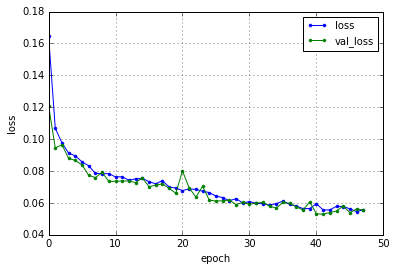

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    for opt,optName in zip(optimizers,optimArray):
        print "hiden node = "+str(encoding_dim)
        CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+optName
        print CommonName
        SaveFileNameEncord=DataName+'_encoded'+CommonName
        SaveFileNameDecord=DataName+'_decoded'+CommonName
        SaveFileNameNet=DataName+'_net'+CommonName
        SaveFileNameTrain=DataName+'_train'+CommonName
        SaveFileNameTest=DataName+'_test'+CommonName
        SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer=opt(), loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
        time.sleep(0.1)
        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()

In [9]:
print "finish"

finish
